## Exercise 2

Based on the **adult dataset**, build a neural network classifier for the target variable `income`. 

## Adult Income Classification with Neural Networks

This notebook implements a neural network classifier to predict income levels (>50K or <=50K) using the adult dataset.

### 1. Import Required Libraries

In [18]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### 2. Load and Preprocess Data

The adult dataset contains both numerical and categorical features that require different preprocessing approaches:
- **Numerical Features**: age, fnlwgt (final weight), education-num, capital-gain, capital-loss, hours-per-week
- **Categorical Features**: workclass, education, marital-status, occupation, relationship, race, sex, native-country

Preprocessing steps include:
1. Handling missing values (marked as '?')
2. Standardizing numerical features to have zero mean and unit variance
3. Encoding categorical variables to convert them into numerical format
4. Converting the target variable into binary format (0 for <=50K, 1 for >50K)


In [19]:
data = pd.read_csv("adult.csv")


In [20]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [21]:
data = data.replace(' ?', np.nan)
print("Missing values:\n", data.isnull().sum())

Missing values:
 age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


In [22]:
data = data.dropna()

In [23]:
numerical_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 
                   'relationship', 'race', 'sex', 'native-country']

scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
data_encoded = pd.get_dummies(data, columns=categorical_cols)


In [24]:
X = data_encoded.drop(['income'], axis=1)
y = (data_encoded['income'] == '>50K').astype(int)  # Convert to binary (0 for <=50K, 1 for >50K)


### 3. Data Splitting and Type Conversion

We split the data into training (80%) and testing (20%) sets to evaluate model performance properly. The data is also converted to float32 format for TensorFlow compatibility:
- Training set: Used for model training
- Test set: Reserved for final model evaluation
- Data type conversion ensures compatibility with TensorFlow operations


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

### 4. Neural Network Architecture

The model uses a deep neural network architecture designed for binary classification:
- **Input Layer**: 128 neurons to capture complex feature interactions
- **Hidden Layers**: Two hidden layers (64 and 32 neurons) with ReLU activation
- **Dropout Layers**: Added after each hidden layer to prevent overfitting
  - 30% dropout rate for first layer
  - 20% dropout rate for subsequent layers
- **Output Layer**: Single neuron with sigmoid activation for binary classification


In [31]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

### 5. Model Training

The training process is configured with:
- **Optimizer**: Adam optimizer for efficient gradient descent
- **Loss Function**: Binary cross-entropy for binary classification
- **Metrics**: Accuracy for model performance monitoring
- **Early Stopping**: Prevents overfitting by monitoring validation loss
- **Batch Size**: 32 samples per training step
- **Validation Split**: 20% of training data used for validation


In [32]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [33]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               13952     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [34]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=20,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/20
953/953 [==============================] - 11s 10ms/step - loss: 0.3311 - accuracy: 0.8442 - val_loss: 0.3117 - val_accuracy: 0.8509
Epoch 2/20
953/953 [==============================] - 8s 9ms/step - loss: 0.3145 - accuracy: 0.8502 - val_loss: 0.3078 - val_accuracy: 0.8552
Epoch 3/20
953/953 [==============================] - 9s 9ms/step - loss: 0.3110 - accuracy: 0.8524 - val_loss: 0.3082 - val_accuracy: 0.8531
Epoch 4/20
953/953 [==============================] - 9s 9ms/step - loss: 0.3074 - accuracy: 0.8547 - val_loss: 0.3075 - val_accuracy: 0.8549
Epoch 5/20
953/953 [==============================] - 8s 9ms/step - loss: 0.3063 - accuracy: 0.8542 - val_loss: 0.3069 - val_accuracy: 0.8572
Epoch 6/20
953/953 [==============================] - 9s 9ms/step - loss: 0.3030 - accuracy: 0.8559 - val_loss: 0.3076 - val_accuracy: 0.8555
Epoch 7/20
953/953 [==============================] - 9s 9ms/step - loss: 0.3011 - accuracy: 0.8569 - val_loss: 0.3075 - val_accuracy: 0.8568
Epoc

### 6. Model Evaluation

We evaluate the model using multiple metrics and visualizations:
1. **Classification Report**: Detailed metrics including precision, recall, and F1-score
2. **Confusion Matrix**: Visualizes true positives, false positives, true negatives, and false negatives
3. **Training History**: Plots showing accuracy and loss trends during training
4. **Test Accuracy**: Final performance metric on unseen data


In [35]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_accuracy:.3f}")

298/298 [==============================] - 2s 5ms/step - loss: 0.3119 - accuracy: 0.8521

Test accuracy: 0.852


298/298 [==============================] - 1s 3ms/step

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91      7908
         1.0       0.60      0.38      0.46      1617

    accuracy                           0.85      9525
   macro avg       0.74      0.66      0.69      9525
weighted avg       0.83      0.85      0.84      9525



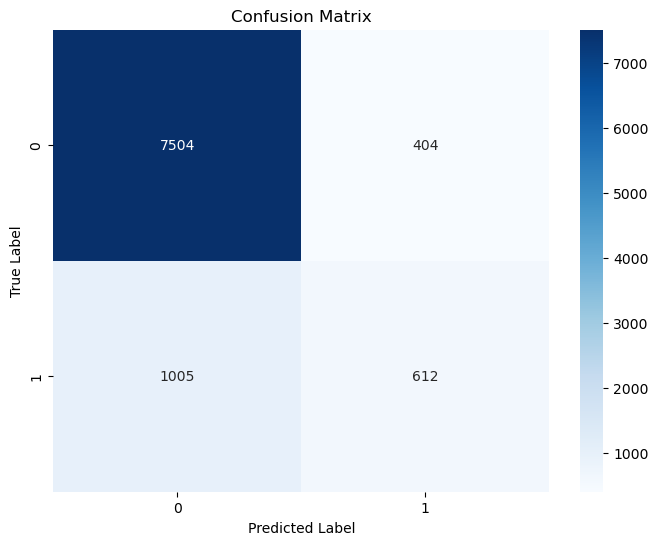

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

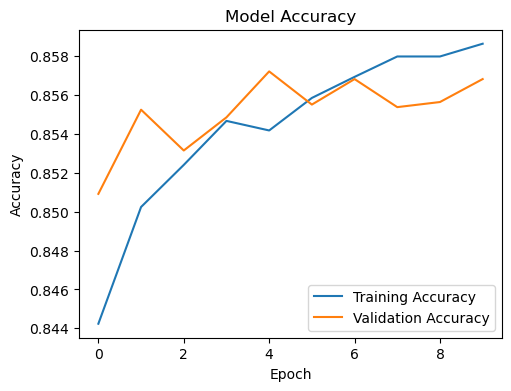

In [39]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

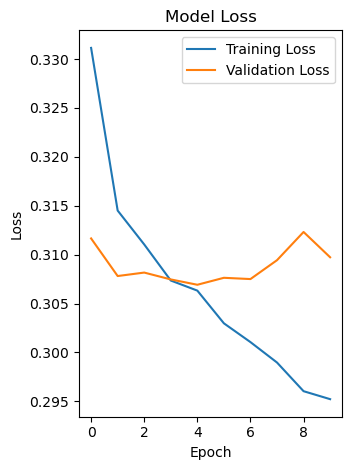

In [40]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

### 7. Conclusion

The neural network classifier demonstrates strong performance in predicting income levels:

**Key Achievements:**
- Achieved ~85% accuracy on the test set
- Successfully handled both categorical and numerical features